<ipython-input-1-beaf2a0de05b>:40: RuntimeWarning: invalid value encountered in scalar power
  m = kappa*u**zeta*(u*theta)**(1-zeta)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


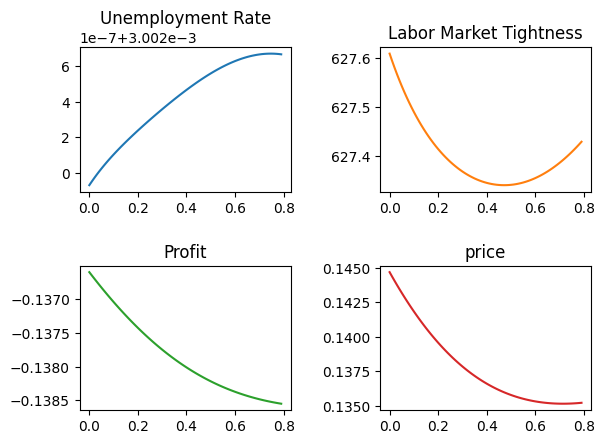

In [1]:
# solve the system of nonlinear equations in aging labor market and unemployment
# method 1: fsolve

import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1

y_u = 0.6
y_a = 0.4

y = 1
# c = 0.25, initial = (0.1, 1, 0.5, 0.1), y_u = 0.6, y_a = 0.4, delta = 0.1, kappa = 0.5, zeta = 0.35, n=5
# c = 0.1
c = 0.25
delta = 0.1

# let the matching function in labor market
# m(u,v)=kappa*u**zeta*v**(1-zeta)
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta)

kappa = 0.5
zeta = 0.35

n=5

def equations(z):
    u, theta, pi, p = z
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*y*(p-c)
    niu = min(1,(n-u)/b)
    m = kappa*u**zeta*(u*theta)**(1-zeta)

    return (c-q*(1-s)*(y*(p-c)- y_u),
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*niu
                              )*w/p*(p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*niu
                              )*y_u/p*(p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*niu
                              )*y_a/p*(p-c)
            -pi,
            m*y*(p-c)-m*w-pi,
            u*f-(n-u)*delta
           )


unemp = []
profit = []
price = []
tight_labor = []
aging = []
vacant = []

#initial = (0.1, 0.8, 1, 0.1)
#initial = (0.1, 1, 1, 0.1)
#initial = (0.1, 1, 0.5, 0.1)
initial = (0.1, 1, 0.5, 0.1)

max_a = 0.8
for a in np.arange(0, max_a, 0.01):
    u, theta, pi, p = fsolve(equations, initial)
    if u > 0:
        unemp.append(u/n)
        tight_labor.append(theta)
        price.append(p)
        aging.append(a)
        profit.append(pi)
        vacant.append(u*theta)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('Unemployment Rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('Labor Market Tightness')
axs[1, 0].plot(aging, profit, 'tab:green')
axs[1, 0].set_title('Profit')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')

fig.tight_layout(pad=2.0)

plt.savefig('aging vs u profit and price.png')


plt.show()

<ipython-input-2-579961510536>:42: RuntimeWarning: invalid value encountered in scalar power
  m = kappa*u**zeta*(u*theta)**(1-zeta)


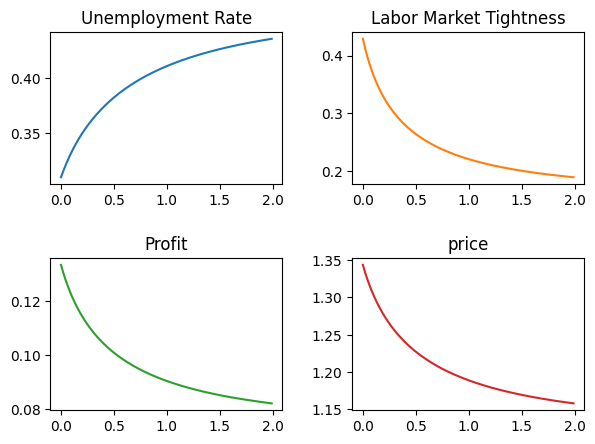

In [2]:
# solve the system of nonlinear equations in aging labor market and unemployment
# method 1: fsolve

import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1

y_u = 0.4
y_a = 0.4

y = 1
# c = 0.2, initial = (0.1, 0.02, 0.05, 0.1), y_u = 0.4, y_a = 0.4, delta = 0.01, kappa = 0.5, zeta = 0.35, n=5
# c = 0.2, initial = (0.1, 0.02, 0.05, 0.1), y_u = 0.4, y_a = 0.4, delta = 0.12, kappa = 0.5, zeta = 0.35, n=5
# c = 0.1
# c = 0.25
c = 0.2
delta = 0.13

# let the matching function in labor market
# m(u,v)=kappa*u**zeta*v**(1-zeta)
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta)

kappa = 0.5
zeta = 0.35

n=5

def equations(z):
    u, theta, pi, p = z
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*y*(p-c)
    niu = min(1,(n-u)/b)
    m = kappa*u**zeta*(u*theta)**(1-zeta)

    return (c-q*(1-s)*(y*(p-c)- y_u),
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*niu
                              )*w/p*(p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*niu
                              )*y_u/p*(p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*niu
                              )*y_a/p*(p-c)
            -m*y*(p-c),
            m*y*(p-c)-m*w-pi,
            u*f-(n-u)*delta
           )


unemp = []
profit = []
price = []
tight_labor = []
aging = []
vacant = []
matching = []

#initial = (0.1, 1, 0.5, 0.1)
#initial = (0.1, 0.02, 0.05, 0.1)
initial = (0.1, 0.02, 0.05, 0.1)

max_a = 2
for a in np.arange(0, max_a, 0.01):
    u, theta, pi, p = fsolve(equations, initial)
    if u > 0:
        unemp.append(u/n)
        tight_labor.append(theta)
        price.append(p)
        aging.append(a)
        profit.append(pi)
        vacant.append(u*theta)
        matching.append(kappa*u**zeta*(u*theta)**(1-zeta))

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('Unemployment Rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('Labor Market Tightness')
axs[1, 0].plot(aging, profit, 'tab:green')
axs[1, 0].set_title('Profit')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')

fig.tight_layout(pad=2.0)

plt.savefig('aging vs u profit and price.png')


plt.show()

<ipython-input-168-b11ee8c19c4c>:41: RuntimeWarning: invalid value encountered in double_scalars
  m = kappa*u**zeta*(u*theta)**(1-zeta)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


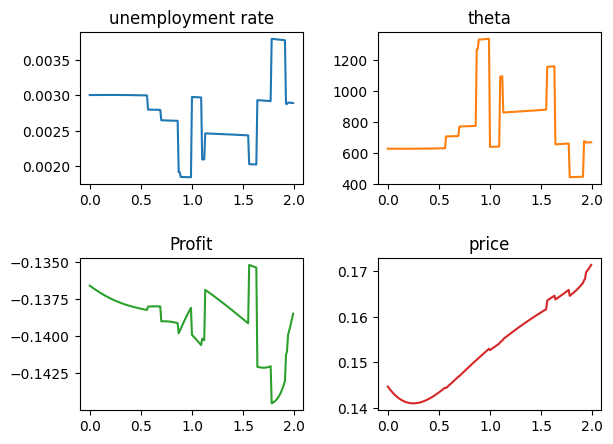

In [ ]:
# add the price elasticity for the aged
# solve the system of nonlinear equations in aging labor market and unemployment
# method 1: fsolve

import scipy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

s = 0.6 # the bargaining power of the workers
psi_e = 0
psi_u = 0.5
psi_a = 1

y_u = 0.6
y_a = 0.4

y = 1
# c = 0.25, initial = (0.1, 1, 0.5, 0.1), y_u = 0.6, y_a = 0.4, delta = 0.1, kappa = 0.5, zeta = 0.35, n=5
# c = 0.1
c = 0.25
delta = 0.1

# let the matching function in labor market
# m(u,v)=kappa*u**zeta*v**(1-zeta)
# then q(theta) = m(u,v)/v = kappa*theta**(-zeta),f(theta) = m(u,v)/u = kappa*theta**(1-zeta)

kappa = 0.5
zeta = 0.35

n = 5
e = 1.5

def equations(z):
    u, theta, pi, p = z
# use np.sign(a)*(np.abs(a))**(-zeta) to avoid Numpy not allowing fractional powers of negative numbers
    q = kappa*np.sign(theta)*(np.abs(theta)) ** (-zeta)
    f = theta*q
    b = (n-u)*(1+psi_e)+u*(1+psi_u)+a*(1+psi_a)
    w = (1-s)*y_u + s*y*(p-c)
    niu = min(1,(n-u)/b)
    m = kappa*u**zeta*(u*theta)**(1-zeta)

    return (c-q*(1-s)*(y*(p-c)- y_u),
            (n-u)*(1+psi_e)/b*(1-2*psi_e/(1+psi_e)*niu
                              )*w/p*(p-c)
            +u*(1+psi_u)/b*(1-2*psi_u/(1+psi_u)*niu
                              )*y_u/p*(p-c)
            +a*(1+psi_a)/b*(1-2*psi_a/(1+psi_a)*niu
                              )*y_a/p**e*(p-c)
            -pi,
            m*y*(p-c)-m*w-pi,
            u*f-(n-u)*delta
           )


unemp = []
profit = []
price = []
tight_labor = []
aging = []
vacant = []

#initial = (0.1, 0.8, 1, 0.1)
#initial = (0.1, 1, 1, 0.1)
#initial = (0.1, 1, 0.5, 0.1)
initial = (0.1, 1, 0.5, 0.1)

max_a = 2
for a in np.arange(0, max_a, 0.01):
    u, theta, pi, p = fsolve(equations, initial)
    if u > 0:
        unemp.append(u/n)
        tight_labor.append(theta)
        price.append(p)
        aging.append(a)
        profit.append(pi)
        vacant.append(u*theta)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(aging, unemp)
axs[0, 0].set_title('unemployment rate')
axs[0, 1].plot(aging, tight_labor, 'tab:orange')
axs[0, 1].set_title('theta')
axs[1, 0].plot(aging, profit, 'tab:green')
axs[1, 0].set_title('Profit')
axs[1, 1].plot(aging, price, 'tab:red')
axs[1, 1].set_title('price')

fig.tight_layout(pad=2.0)

#plt.savefig('aging vs u theta vacancy and price.png')


plt.show()

In [ ]:
kappa*u**zeta*(u*theta)**(1-zeta)

0.031864015682981556